
1. Load Dataset

In [4]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of each dataset
print("Training Data:")
print(train_df.head())
print("\nValidation Data:")
print(val_df.head())
print("\nTesting Data:")
print(test_df.head())


Training Data:
                                               tweet  label
0    ज्येष्ठ पत्रकार अनंत दीक्षित यांच्या निधनाचे...     -1
1    सर्वोच्च न्यायालयाचे निर्देश डावलून पुणे पोल...     -1
2    उद्धव ठाकरेंनी भाजपासोबत युती करून शिवसैनिका...     -1
3    आपला समाज खूप मोठा आहे. त्यात अनेक घटक अंतर्...      1
4  बलात्काराचा बदला बलात्काराने घेतला पाहिजे हे म...     -1

Validation Data:
                                               tweet  label
0    कोरोना काळात आपले पंतप्रधान मा. नरेंद्र मोदी...      1
1    पुणे येथे राष्ट्रसेवा दल अभ्यासिका विभाग यां...      1
2    पुणे येथील "क्रांती ज्योती" या कार्यक्रमात ज...      0
3    आद्यक्रांतिकारक उमाजीराजे नाईक यांना जयंतीनि...      1
4    महाराष्ट्राचे मुख्यमंत्री म्हणून शपथ घेतल्या...      1

Testing Data:
                                               tweet  label
0   #BetiBachao चा फक्त नारा देऊन उपयोग नाही. महि...      1
1    पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्यान...     -1
2    लूट झूट का राज भागावो,  \nरोजगार और विकास ला...

2. Analyse the dataset

In [14]:
# Check for missing values and data types in each dataset
print("Training Data Info:")
print(train_df.info())
print("\nValidation Data Info:")
print(val_df.info())
print("\nTesting Data Info:")
print(test_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12114 entries, 0 to 12113
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet         12114 non-null  object
 1   label         12114 non-null  int64 
 2   cleaned_text  12114 non-null  object
dtypes: int64(1), object(2)
memory usage: 284.0+ KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet         1500 non-null   object
 1   label         1500 non-null   int64 
 2   cleaned_text  1500 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.3+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 


3. Load Marathi Stopwords list

In [15]:
# Load custom Marathi stopwords from the text file
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()
    return set(stopwords)

# Load stopwords
marathi_stopwords = load_stopwords('marathi_stopwords.txt')


4. Pre-process the text in dataset

In [7]:
import re
import nltk

# Download necessary NLTK resources
nltk.download('punkt')

# Define a function for preprocessing text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = nltk.word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in marathi_stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to each dataset
train_df['cleaned_text'] = train_df['tweet'].apply(preprocess_text)
val_df['cleaned_text'] = val_df['tweet'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['tweet'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


5. Vectorize the text data

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Vectorize training data
X_train_vectorized = vectorizer.fit_transform(train_df['cleaned_text'])
y_train = train_df['label']

# Vectorize validation and testing data
X_val_vectorized = vectorizer.transform(val_df['cleaned_text'])
y_val = val_df['label']
X_test_vectorized = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']


6. Train the ML model

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

7. Predict on Validation and testing data and evaluate

Validation Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.92      0.82       500
           0       0.78      0.71      0.75       500
           1       0.85      0.72      0.78       500

    accuracy                           0.78      1500
   macro avg       0.79      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500



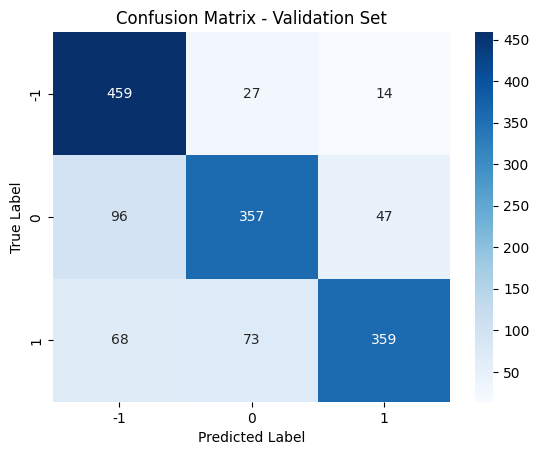

Test Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.91      0.82       750
           0       0.77      0.71      0.74       750
           1       0.84      0.71      0.77       750

    accuracy                           0.78      2250
   macro avg       0.78      0.78      0.78      2250
weighted avg       0.78      0.78      0.78      2250



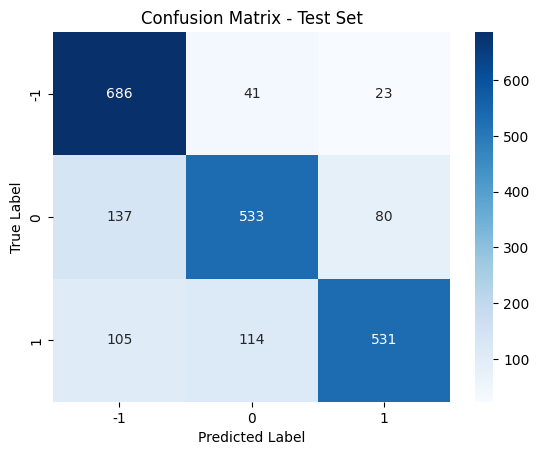

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = model.predict(X_val_vectorized)

# Classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict on test set
y_test_pred = model.predict(X_test_vectorized)

# Classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


8. Sentiment Prediction Function

In [11]:
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]


9. Example User Prediction

In [17]:
# User input for sentiment prediction
user_input = input("Enter Sentence: ")  # "Please enter your text: "
sentiment = predict_sentiment(user_input)
print(f'भावना: {sentiment}')  # "Sentiment:"


Enter Sentence: आज त्याची पहिली बाईक मिळाल्याने समितला खूप आनंद झाला
भावना: 1
